# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import folium


In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [3]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [4]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [5]:
y.describe()

count    400000.000000
mean         11.339074
std           9.785912
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

(array([3.41759e+05, 4.21200e+04, 1.10220e+04, 4.38500e+03, 4.20000e+02,
        1.43000e+02, 5.40000e+01, 4.10000e+01, 1.70000e+01, 1.50000e+01,
        2.00000e+00, 4.00000e+00, 8.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <BarContainer object of 30 artists>)

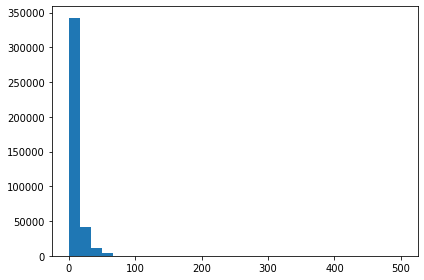

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(tight_layout=True)
ax.hist(y, bins=30)


### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation

In [7]:
from sklearn.model_selection import train_test_split
train_mask = X['pickup_year'] <= 2014
test_mask = X['pickup_year'] == 2015

X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[test_mask]
y_test = y[test_mask]

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [8]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_jobs=-1, n_estimators=50)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [9]:
from sklearn.metrics import mean_squared_error
pred = regr.predict(X_test)
mean_squared_error(y_test, pred)


21.73773392127358

- Default: MSE 21.101
- n_estimators=50: MSE 21.11 (aber schneller)
- n_estimators=30: MSE 22.09 (aber viel schneller) +++verworfen+++
- max_depth=30: MSE 21.53 +++verworfen+++
- max_depth=80: MSE 21.64 +++verworfen+++
- max_depth=200: MSE 21.64 +++verworfen+++
- min_samples_split=3: MSE 21.61 +++verworfen+++
- min_samples_split=30: MSE 21.44 +++verworfen+++
- min_samples_split=60: MSE 21.71 +++verworfen+++
- min_samples_leaf=2: MSE 21.22 +++verworfen+++
- min_samples_leaf=4: MSE 21.26 +++verworfen+++
- min_samples_leaf=3: MSE 21.31 +++verworfen+++

Keine Parametereinstellung brachte eine wesentliche Verbesserung

Text(0, 0.5, 'Predicted')

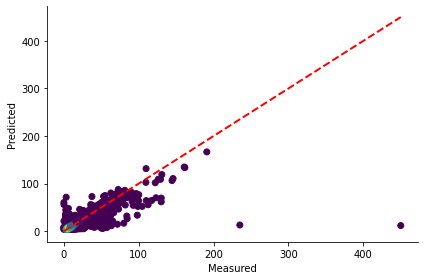

In [10]:
from scipy.stats import gaussian_kde

fig, ax = plt.subplots(tight_layout=True)
ax.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            '--r', linewidth=2)
xy = np.vstack([y_test,pred])
z = gaussian_kde(xy)(xy)
ax.scatter(y_test,  pred, c=z)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


Am besten funktioniert das Modell für den Bereich niedrigen Bereich. Hier gibts es auch die meisten Trainingsdaten.
Es fällt auf dass im niedrigen Bereich bis ca 25 tendenziell zu hoch prädiktiert wird wohingegen danach
eher zu niedrig Prädiktiert werden. Die Extremwerte bei 230 und 500 sind aufgrund fehlender Daten nicht gut prädiktiert.
Man könnte Prüfen ob man durch Filterung der Ausgangsdaten auf das 75 oder 95 Quantil eine wesentliche Verbesserung
erreichen könnte.